In [2]:
import pandas as pd

data_frame = pd.read_csv('data/dirty_cafe_sales.csv')

In [3]:
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
data_frame.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [5]:
list(data_frame.columns)

['Transaction ID',
 'Item',
 'Quantity',
 'Price Per Unit',
 'Total Spent',
 'Payment Method',
 'Location',
 'Transaction Date']

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [7]:
data_frame.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [8]:
data_frame.isnull()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,True,False,False
9996,False,True,False,True,False,False,True,False
9997,False,False,False,False,False,False,True,False
9998,False,False,False,True,False,False,True,False


In [9]:
data_frame.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [10]:
data_frame.dropna()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9984,TXN_3142496,Smoothie,UNKNOWN,4.0,4.0,Cash,Takeaway,2023-07-27
9986,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


In [11]:
for col in data_frame.columns:
    if data_frame[col].dtype in ['float64', 'int64']:   # cột số
        mean_value = data_frame[col].mean()
        data_frame[col].fillna(mean_value)
    else:                                       # cột chữ (object)
        mode_value = data_frame[col].mode()[0]
        data_frame[col].fillna(mode_value)

print(data_frame)

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
0       TXN_1961373    Coffee        2            2.0         4.0   
1       TXN_4977031      Cake        4            3.0        12.0   
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
4       TXN_3160411    Coffee        2            2.0         4.0   
...             ...       ...      ...            ...         ...   
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card 

In [12]:
data_frame.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [13]:
data_frame.isnull()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,True,False,False
9996,False,True,False,True,False,False,True,False
9997,False,False,False,False,False,False,True,False
9998,False,False,False,True,False,False,True,False


In [14]:
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [15]:
data_frame.drop(index = 3,inplace = True)
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31


In [16]:
data_frame.rename({0:"First",4:"Second"})
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31


In [17]:
data_frame['NewColumn'] = 1
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,1
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,1
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19,1
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,1
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31,1


In [18]:
data_frame.sort_values(by="Quantity",ascending=False).head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn
8752,TXN_9432268,Salad,UNKNOWN,5.0,20.0,NaN,Takeaway,2023-01-25,1
3779,TXN_7376255,UNKNOWN,UNKNOWN,UNKNOWN,25.0,NaN,In-store,2023-05-27,1
8517,TXN_5875201,UNKNOWN,UNKNOWN,4.0,4.0,NaN,In-store,2023-01-31,1
7814,TXN_2628157,Coffee,UNKNOWN,2.0,8.0,Digital Wallet,NaN,2023-10-26,1
6588,TXN_9863114,Juice,UNKNOWN,3.0,15.0,NaN,Takeaway,2023-02-01,1


In [27]:
for col in data_frame.columns:
    if data_frame[col].dtype in ['float64', 'int64']:   # cột số
        mean_value = data_frame[col].mean()
        data_frame[col].fillna(mean_value)
    else:                                       # cột chữ (object)
        mode_value = data_frame[col].mode()[0]
        data_frame[col].fillna(mode_value)
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,1
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,1
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19,1
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,1
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Takeaway,2023-03-31,1


In [28]:
data_frame.describe()

,NewColumn
count,9999.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [29]:
data_frame.isnull()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False


In [30]:
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,1
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,1
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19,1
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,1
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Takeaway,2023-03-31,1


In [32]:
data_frame.sort_values(by=["Quantity","Price Per Unit"],ascending=False).tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn
9875,TXN_3224156,Cookie,1,1.0,1.0,Credit Card,In-store,2023-03-16,1
9894,TXN_4339925,Cookie,1,1.0,1.0,Cash,Takeaway,2023-11-23,1
9901,TXN_9053365,Cookie,1,1.0,1.0,Digital Wallet,In-store,2023-07-15,1
9907,TXN_8104914,Cookie,1,1.0,1.0,Digital Wallet,Takeaway,ERROR,1
9976,TXN_3528020,Cookie,1,1.0,1.0,Digital Wallet,Takeaway,2023-08-26,1


In [33]:
#Creating dataframe1
df1 = pd.DataFrame({
        'Name':['Jeevan', 'Raavan', 'Geeta', 'Bheem'],
        'Age':[25, 24, 52, 40],
        'Qualification':['Msc', 'MA', 'MCA', 'Phd']})
df1

,Name,Age,Qualification
0,Jeevan,25,Msc
1,Raavan,24,MA
2,Geeta,52,MCA
3,Bheem,40,Phd


In [34]:
#Creating dataframe2
df2 = pd.DataFrame({'Name':['Jeevan', 'Raavan', 'Geeta', 'Bheem'],
                    'Salary':[100000, 50000, 20000, 40000]})
df2

,Name,Salary
0,Jeevan,100000
1,Raavan,50000
2,Geeta,20000
3,Bheem,40000


In [37]:
df = pd.merge(df1,df2)
df

,Name,Age,Qualification,Salary
0,Jeevan,25,Msc,100000
1,Raavan,24,MA,50000
2,Geeta,52,MCA,20000
3,Bheem,40,Phd,40000


In [38]:
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,1
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,1
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19,1
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,1
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Takeaway,2023-03-31,1


In [41]:
def fun(value):
    if value == "ERROR":
        return "NO"
    if float(value) > 2:
        return "YES"
    return "NO"
data_frame['Tai_xiu'] = data_frame["Total Spent"].apply(fun)

In [42]:
data_frame.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,NewColumn,Tai_xiu
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,1,YES
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,1,YES
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19,1,NO
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,1,YES
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Takeaway,2023-03-31,1,YES


In [1]:
data_frame.plot(x = 'Item Name', y = 'Total Spent', kind = 'bar')


NameError: name 'data_frame' is not defined

<Axes: ylabel='Frequency'>

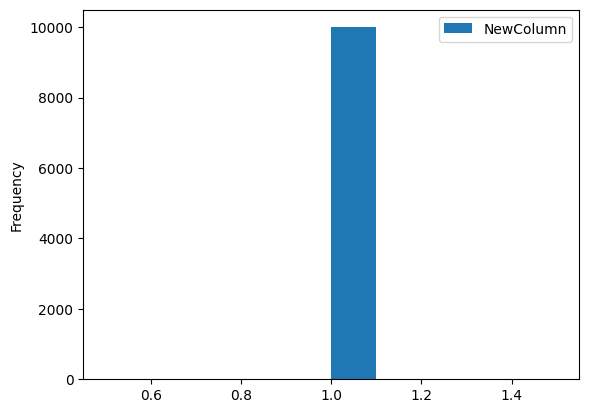

In [46]:
data_frame.plot.hist()